# Tugas Besar IF5100 Pemrograman Untuk Data Analitik
- 13520017 Diky Restu Maulana
- 23523009 Rahayu Utari
- 23523034 Husni Fadhilah Dhiya Ul Haq

In [ ]:
# imports
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

warnings.filterwarnings("ignore")

## Dataset

In [ ]:
# Load dan read data
df = pd.read_csv("phishing_dataset_full.csv")
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,892.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,0.0,1.0,3.0,0.0,3.0,0.0,2.0,0.0,0.0,...,1.0,2.0,1.0,9540.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,3.0,589.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,292.0,1.0,0.0,0.0,0.0,0.0,1.0
4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,3597.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Jumlah baris dan kolom
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 88647
Columns: 112


In [ ]:
# Nama kolom
df.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [ ]:
# Tipe data setiap kolom
df.dtypes

qty_dot_url              object
qty_hyphen_url          float64
qty_underline_url       float64
qty_slash_url           float64
qty_questionmark_url    float64
                         ...   
qty_redirects           float64
url_google_index        float64
domain_google_index     float64
url_shortened           float64
phishing                float64
Length: 112, dtype: object

## Preprocessing

### Noise

In [ ]:
# Split setiap nilai ke setiap kolom
def split_value(idx):
    if len(df['qty_dot_url'][idx].split(',')) == 112:
        for i,split in enumerate(df['qty_dot_url'][idx].split(',')):
            df.iloc[idx,i] = split

In [ ]:
# Lakukan pada baris dengan index 13 dan 187
split_value(13)
split_value(187)

### Missing Values

In [ ]:
# Menghitung jumlah baris yang bernilai NaN pada setiap kolom
df.isna().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [ ]:
# Tampilkan baris yang mengandung missing value
df[df.isna().any(axis=1)]

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,2.0,291.0,0.0,0.0,0.0,0.0,0.0,0.0
190,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0
420,1,0.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,...,1.0,3.0,7.0,595.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Isi missing values (NaN) yang tersisa dengan nilai -1
for column in df.columns[df.isna().any()]:
  df[column].fillna(0, inplace=True)

In [ ]:
# Mengganti missing values lain dengan nilai -1
values_to_replace = ['""', '"no"', '-']
df = df.replace(values_to_replace, -1)

In [ ]:
# Menghitung kemunculan nilai negatif pada setiap kolom
df.apply(lambda col: col.eq(-1).sum())

qty_dot_url                0
qty_hyphen_url             0
qty_underline_url          0
qty_slash_url              0
qty_questionmark_url       0
                        ... 
qty_redirects           6949
url_google_index          90
domain_google_index       88
url_shortened              0
phishing                   0
Length: 112, dtype: int64

### Mistype

In [ ]:
exclude_columns = ['time_response']

# Ubah tipe data kolom ke integer kecuali yang ada di exclude_columns
df[df.columns.difference(exclude_columns)] = df[df.columns.difference(exclude_columns)].apply(pd.to_numeric, errors='coerce').astype('int')
df[exclude_columns] = df[exclude_columns].apply(pd.to_numeric, errors='coerce').astype('float')
df.dtypes

qty_dot_url             int64
qty_hyphen_url          int64
qty_underline_url       int64
qty_slash_url           int64
qty_questionmark_url    int64
                        ...  
qty_redirects           int64
url_google_index        int64
domain_google_index     int64
url_shortened           int64
phishing                int64
Length: 112, dtype: object

### Outliers

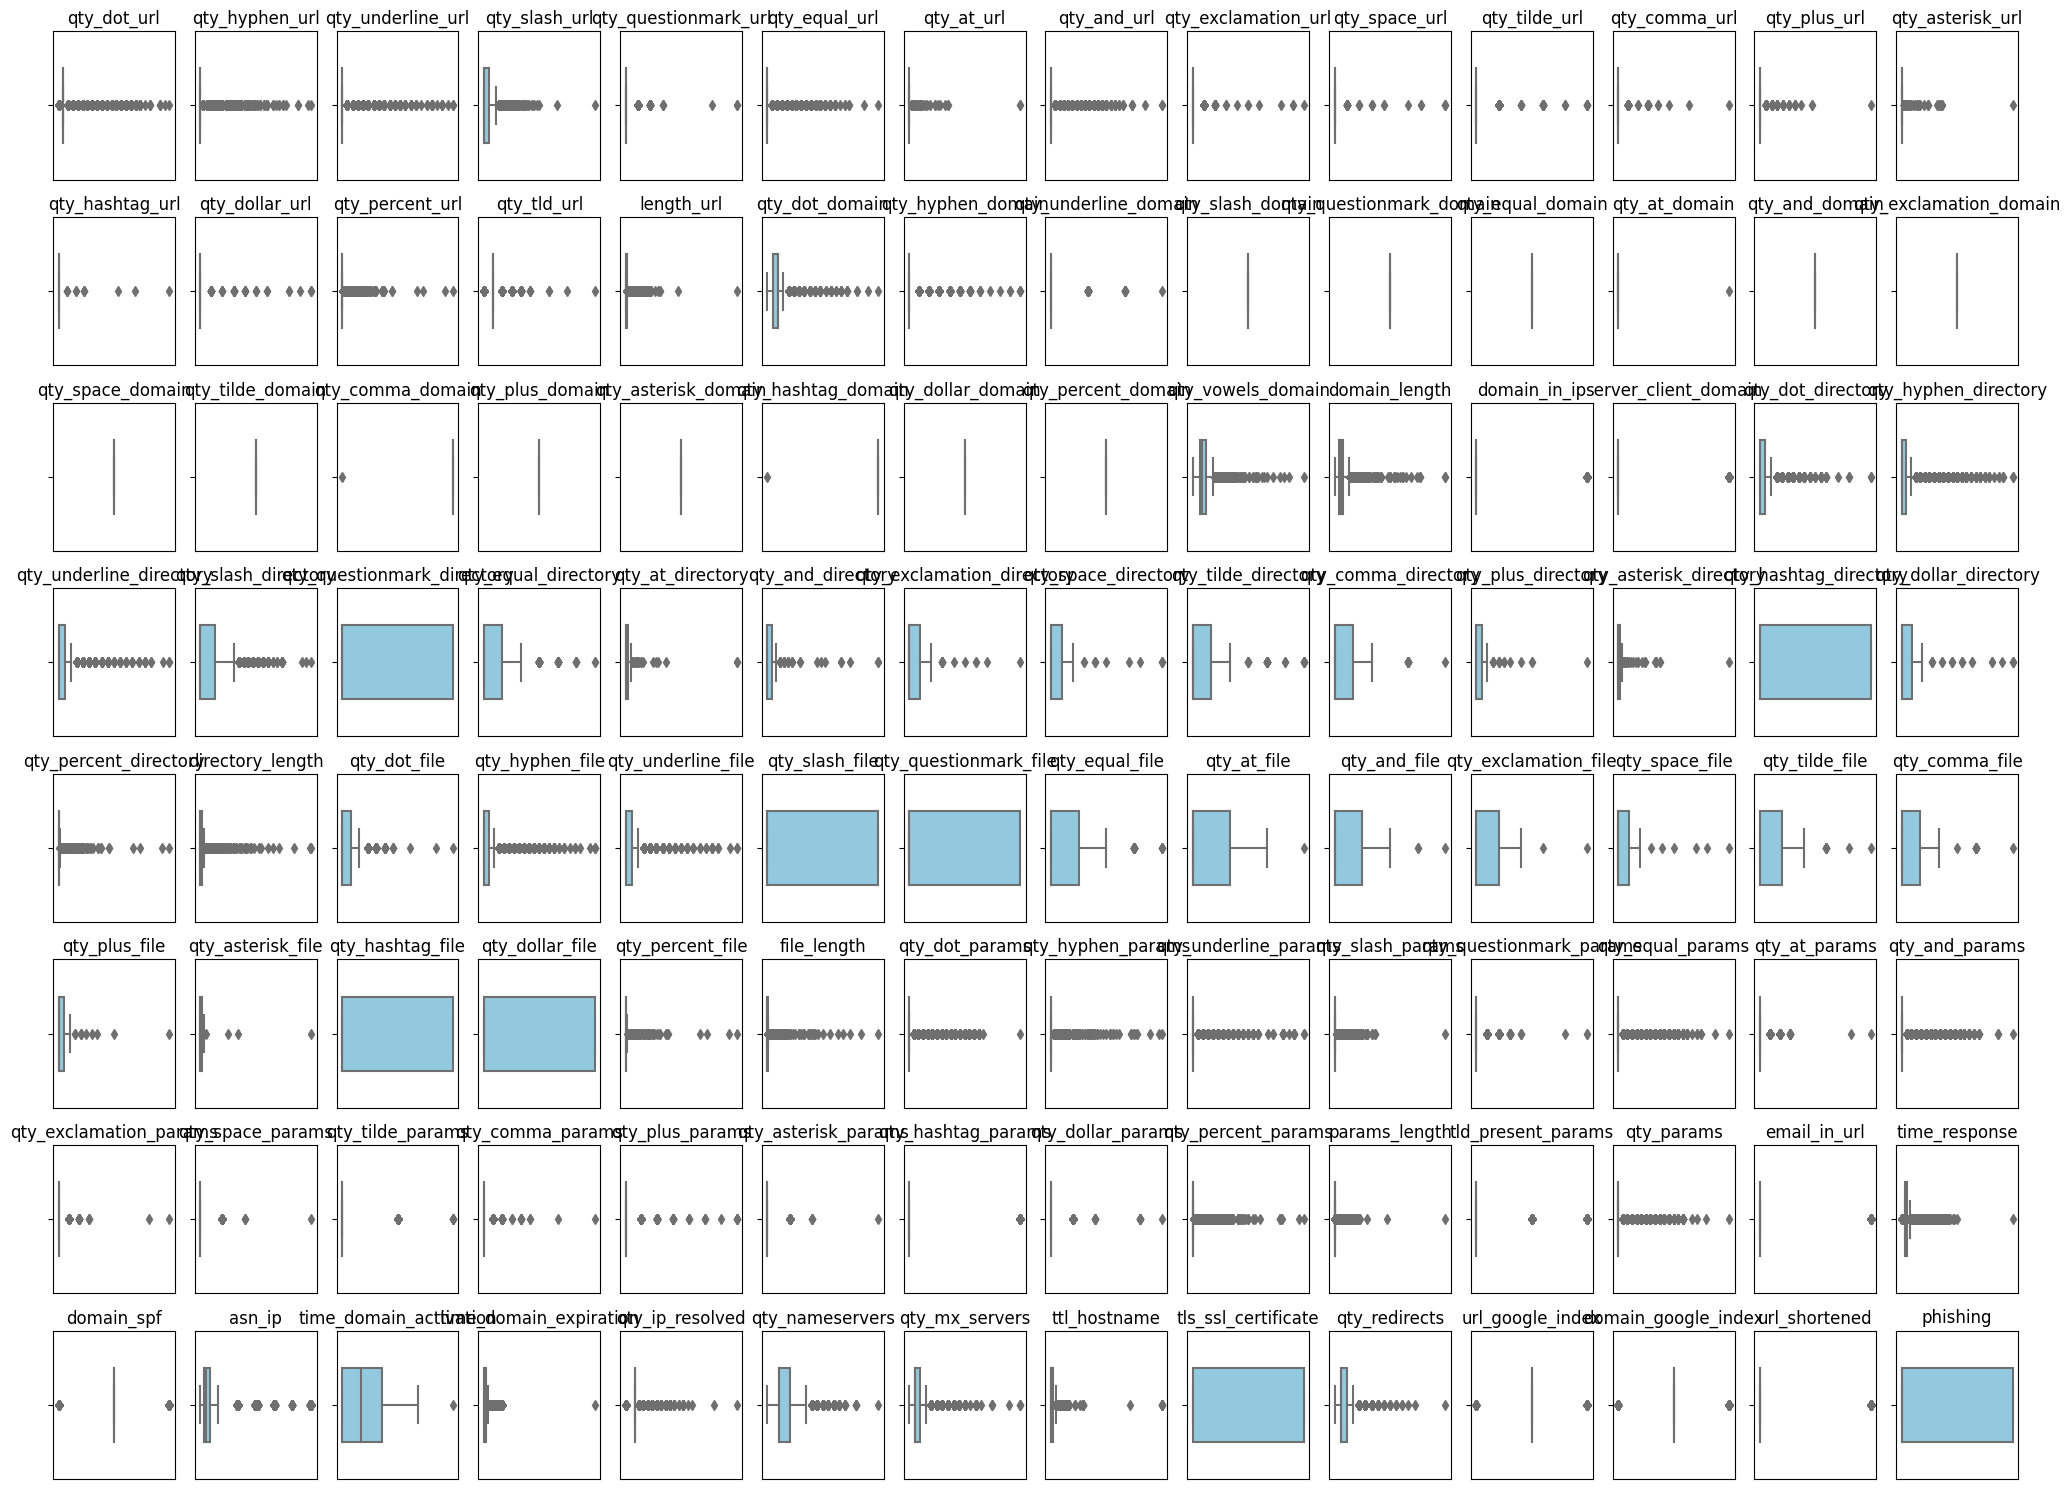

In [ ]:
# Set up the subplot grid
fig, axes = plt.subplots(nrows=8, ncols=14, figsize=(20, 15), sharey=True)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Loop through each column and create a boxplot
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i], width=0.5, color='skyblue')

    # Customize subplot appearance
    axes[i].set_title(col)
    axes[i].get_xaxis().set_visible(False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Feature Engineering

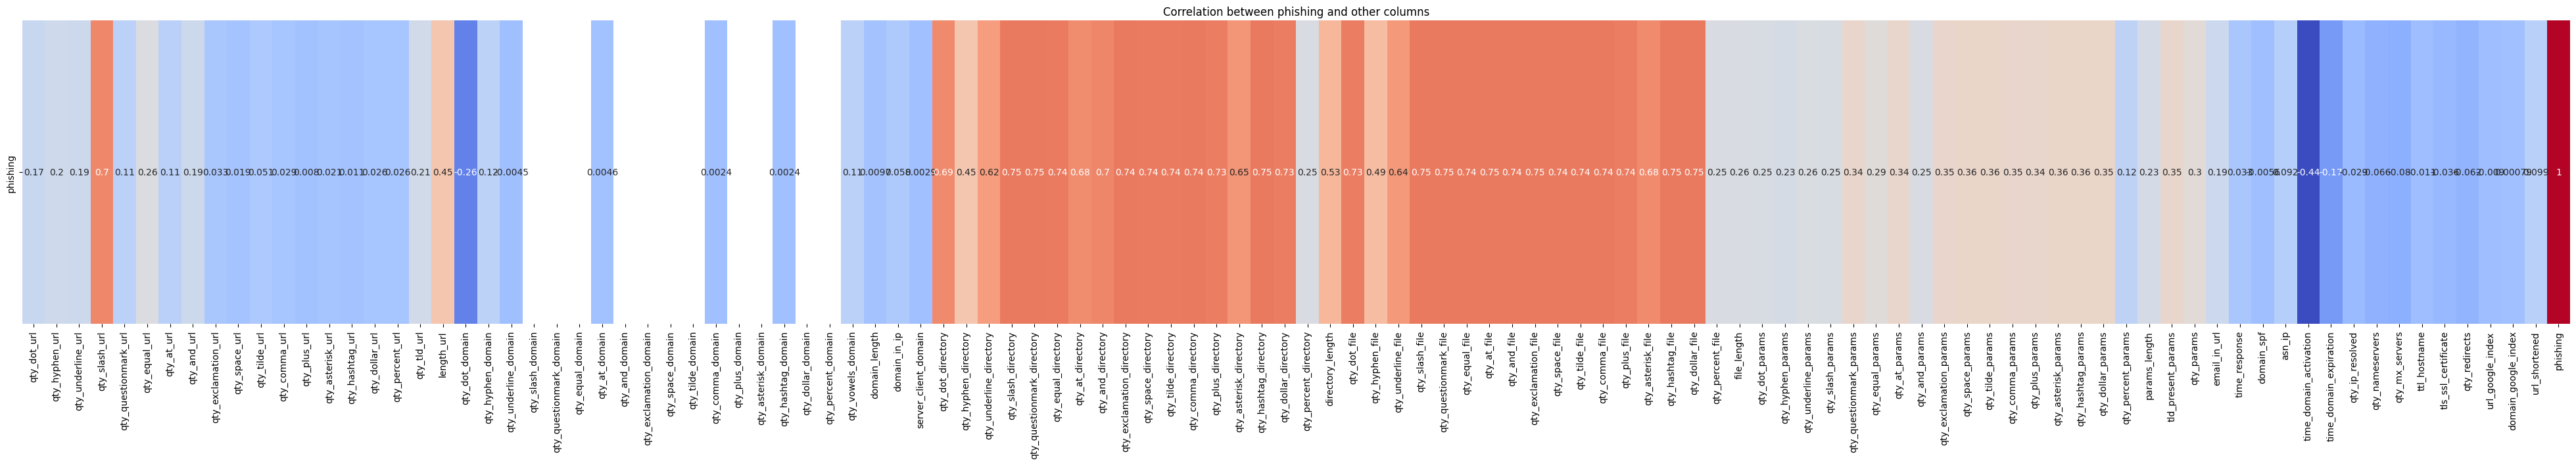

In [ ]:
# Hubungan setiap kolom terhadap kolom target (phishing)
plt.figure(figsize=(50, 6))
sns.heatmap(df.corr()['phishing'].to_frame().T, annot=True, cmap='coolwarm', cbar=False)
plt.title(f'Correlation between phishing and other columns')
plt.show()

In [ ]:
# Drop semua kolom yang tidak berkorelasi
df.drop(columns=['qty_slash_domain', 'qty_questionmark_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_dollar_domain', 'qty_percent_domain'], inplace=True)
len(df.columns)

102

### Imbalance

In [ ]:
# Cek imbalance
class_counts = df['phishing'].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
0    58000
1    30647
Name: phishing, dtype: int64


In [ ]:
# Oversampling jika diperlukan
resampling = RandomOverSampler(random_state=42)
# resampling = RandomUnderSampler(random_state=42)
# resampling = SMOTE(random_state=0)
X_resampled, y_resampled = resampling.fit_resample(df.drop('phishing', axis=1), df['phishing'])
df = pd.concat([pd.DataFrame(X_resampled, columns=df.drop('phishing', axis=1).columns), pd.Series(y_resampled, name='phishing')], axis=1)

## Normalisasi

In [ ]:
# Split features dan label
X = df.drop(columns = 'phishing')
y = df[['phishing']]
X.shape, y.shape

((116000, 101), (116000, 1))

In [ ]:
# Normalisasi Scaler
# X = StandardScaler().fit_transform(X)
X = MinMaxScaler().fit_transform(X)

## Machine Learning

### Split Dataset

In [ ]:
# Split train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((92800, 101), (23200, 101), (92800, 1), (23200, 1))

### Training

In [ ]:
import time, warnings
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

# Inisialisasi model-model
models = [
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('ExtraTrees', ExtraTreesClassifier()),
    ('XGBoost', xgb.XGBClassifier()),
    ('LightGBM', lgbm.LGBMClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('LinearDiscriminant', LinearDiscriminantAnalysis()),
    ('Logistic Regression', LogisticRegression()),
    ('SGD', SGDClassifier()),
]

# Membuat dictionary untuk menyimpan hasil evaluasi
evaluation_results = {}

# Inisialisasi list untuk menyimpan hasil metrik
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []
model_names = []
confusion_matrices = []

# Loop melalui setiap model
for model_name, model in models:
    print(f"Metrics for {model_name}:")
    # Log waktu mulai model training
    start_time = time.time()

    # Pelatihan model
    model.fit(X_train, y_train)

    # Menghitung waktu pelatihan
    training_time = time.time() - start_time

    # Memprediksi data pengujian
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test,y_pred)

    # Menyimpan metrik evaluasi ke dalam dictionary
    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'Classifier Score (Training)': model.score(X_train,y_train),
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC Score': roc_auc,
        'Training Time': training_time
    }

    for metric, value in evaluation_results[model_name].items():
        print(f"{metric}: {value:.4f}")
    print()
    # Menyimpan metrik ke dalam list
    model_names.append(model_name)
    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append((model_name, cm))

Metrics for RandomForest:
Accuracy: 0.9820
Classifier Score (Training): 0.9999
Precision: 0.9821
Recall: 0.9820
F1 Score: 0.9820
ROC-AUC Score: 0.9820
Training Time: 22.2753

Metrics for ExtraTrees:
Accuracy: 0.9822
Classifier Score (Training): 0.9999
Precision: 0.9822
Recall: 0.9822
F1 Score: 0.9822
ROC-AUC Score: 0.9822
Training Time: 24.0611

Metrics for XGBoost:
Accuracy: 0.9738
Classifier Score (Training): 0.9810
Precision: 0.9738
Recall: 0.9738
F1 Score: 0.9738
ROC-AUC Score: 0.9738
Training Time: 2.8333

Metrics for LightGBM:
[LightGBM] [Info] Number of positive: 46413, number of negative: 46387
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3091
[LightGBM] [Info] Number of data points in the train set: 92800, number of used features: 97
[LightGBM] [Info] [binary:BoostFromSc

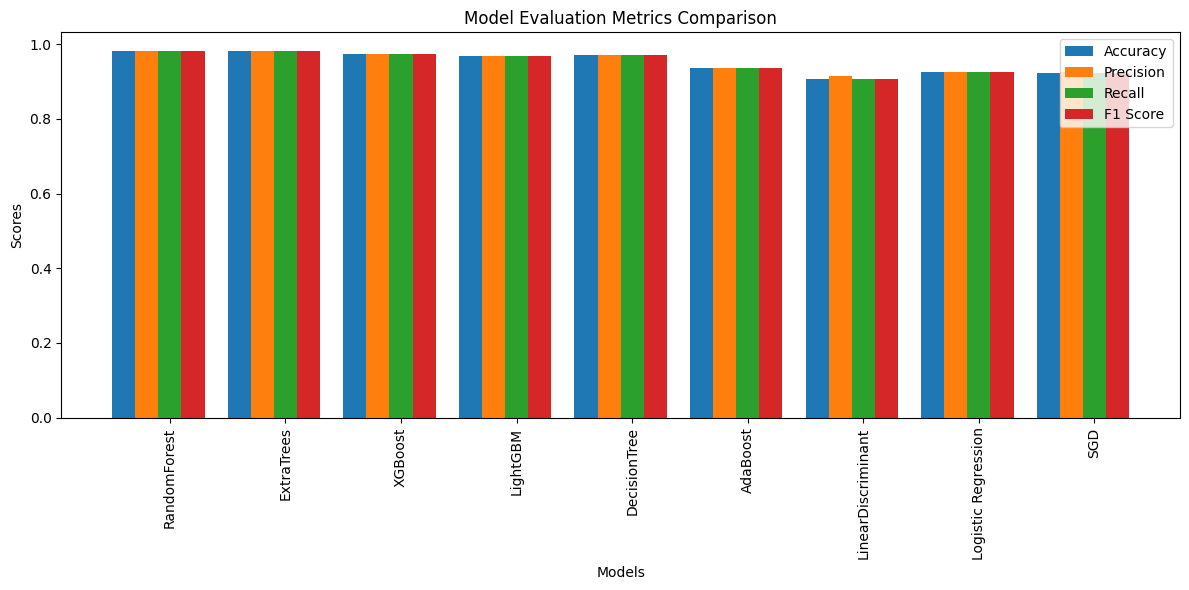

In [ ]:
# Plotting multiple bar untuk setiap metrik evaluasi
bar_width = 0.2
index = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(index - bar_width, accuracy_values, bar_width, label='Accuracy')
bar2 = ax.bar(index, precision_values, bar_width, label='Precision')
bar3 = ax.bar(index + bar_width, recall_values, bar_width, label='Recall')
bar4 = ax.bar(index + 2*bar_width, f1_values, bar_width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Create a DataFrame from the results
df_results = pd.DataFrame.from_dict(evaluation_results, orient='index', columns=['Accuracy', 'Classifier Score (Training)', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC Score', 'Training Time'])
df_results.sort_values(by='Accuracy', ascending=False)

,Accuracy,Classifier Score (Training),Precision,Recall,F1 Score,ROC-AUC Score,Training Time
ExtraTrees,0.982155,0.999935,0.982214,0.982155,0.982155,0.982161,24.061101
RandomForest,0.982026,0.999935,0.982144,0.982026,0.982025,0.982035,22.275272
XGBoost,0.973793,0.980970,0.973809,0.973793,0.973793,0.973796,2.833288
DecisionTree,0.971767,0.999935,0.971856,0.971767,0.971766,0.971775,3.174400
LightGBM,0.967931,0.971185,0.967946,0.967931,0.967931,0.967934,3.128678
AdaBoost,0.935733,0.933858,0.935865,0.935733,0.935729,0.935742,18.261719
Logistic Regression,0.924526,0.925722,0.925568,0.924526,0.924482,0.924553,3.352055
SGD,0.921595,0.922640,0.923850,0.921595,0.921494,0.921636,1.008973
LinearDiscriminant,0.906466,0.908276,0.913352,0.906466,0.906082,0.906538,2.769182


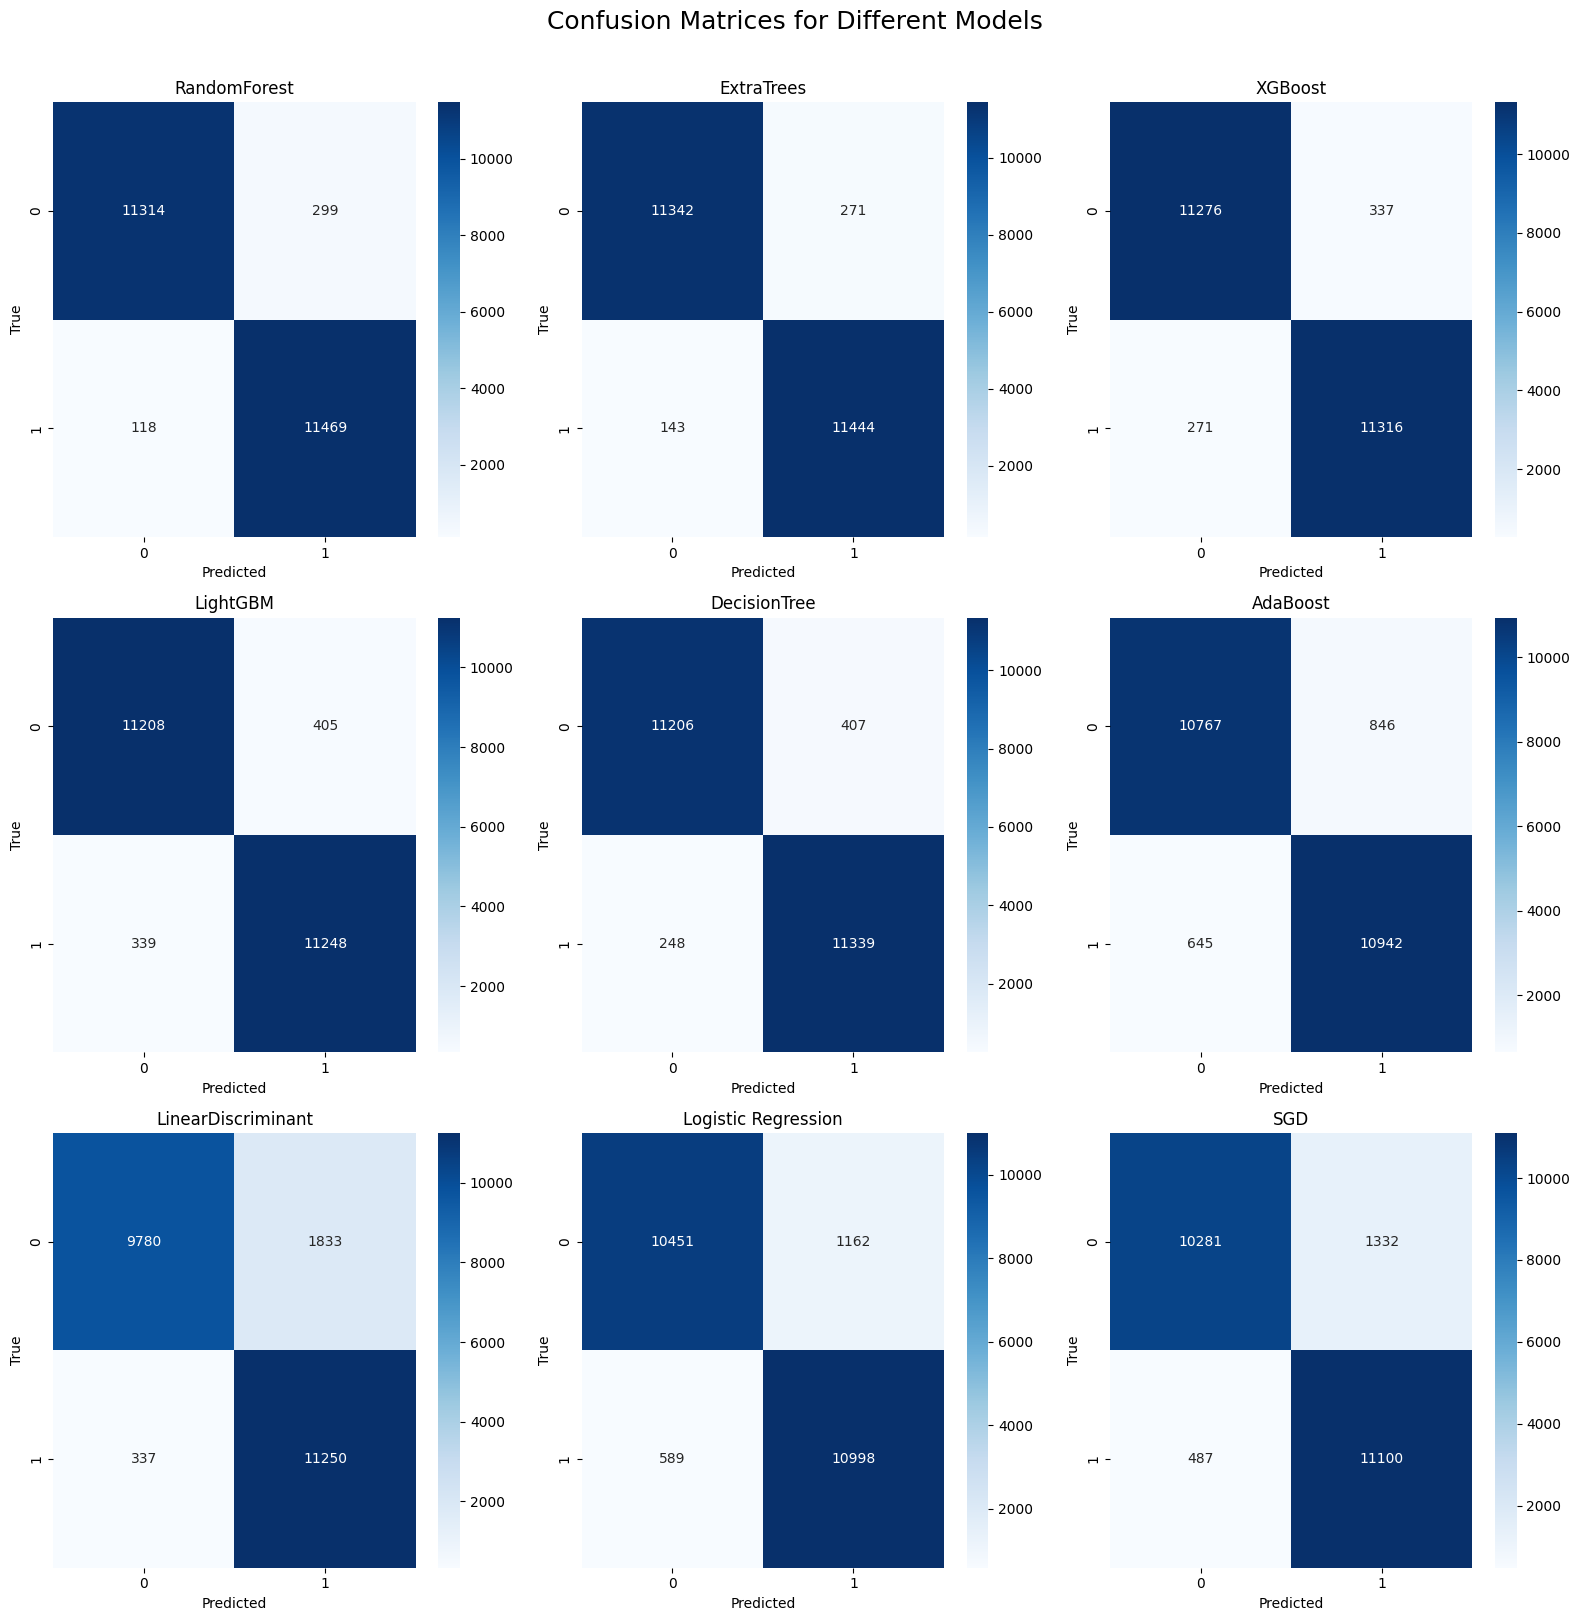

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
fig.suptitle('Confusion Matrices for Different Models', fontsize=18, y=1.01)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

for i, (model_name, cm) in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()